In [ ]:

from mysql.connector import connect
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
conn = connect(
    host = '127.0.0.1',
    user= 'root',
    password='123456',
    database='salesdb',
    port = 3306    
)
conn.is_connected()

True

In [164]:
sql = """
SELECT ORDERNUMBER, ORDERDATE, TOTALAMOUNT, CUSTOMERID,
    MAX(TOTALAMOUNT) OVER(PARTITION by CUSTOMERID) AS MAX_TOTAL
FROM ORDERS WHERE YEAR(ORDERDATE)=2013
ORDER BY ORDERNUMBER
"""
df = pd.read_sql(sql, conn)
df['CUSTOMERID'].value_counts()
df.head()


,ORDERNUMBER,ORDERDATE,TOTALAMOUNT,CUSTOMERID,MAX_TOTAL
0,542530,2013-01-01,3063.0,19,3063.00
1,542531,2013-01-01,3868.6,65,10495.60
2,542532,2013-01-02,2713.5,20,8623.45
3,542533,2013-01-03,1005.9,20,8623.45
4,542534,2013-01-03,1675.0,49,1675.00


In [165]:
sql = """
SELECT ORDERNUMBER, MONTH(ORDERDATE), TOTALAMOUNT, 
    DENSE_RANK() OVER(PARTITION BY MONTH(ORDERDATE) ORDER BY TOTALAMOUNT DESC) AS RK
FROM ORDERS WHERE YEAR(ORDERDATE)=2013
"""
df = pd.read_sql(sql, conn)
df.tail()

,ORDERNUMBER,MONTH(ORDERDATE),TOTALAMOUNT,RK
403,542923,12,191.1,44
404,542908,12,96.5,45
405,542897,12,28.0,46
406,542937,12,18.4,47
407,542912,12,12.5,48


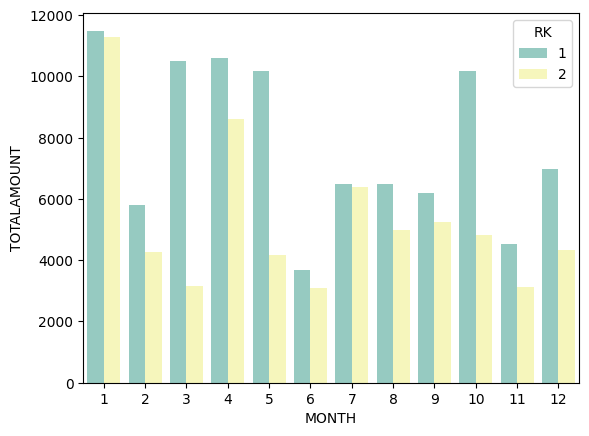

In [166]:
sql = """
SELECT MONTH, TOTALAMOUNT, RK FROM (
    SELECT ORDERNUMBER, 
    MONTH(ORDERDATE) AS MONTH,
    TOTALAMOUNT,
    RANK() OVER(partition by MONTH(ORDERDATE) ORDER BY TOTALAMOUNT DESC) AS RK
    FROM ORDERS
    WHERE YEAR(ORDERDATE) = 2013
) AS subquery
WHERE RK <=2
ORDER BY MONTH ASC, TOTALAMOUNT DESC
"""
df = pd.read_sql(sql, conn)
df.head()
df[['MONTH', 'TOTALAMOUNT']]
sns.barplot( x='MONTH', y='TOTALAMOUNT', hue = 'RK',data=df, palette = 'Set3')
#phải dùng sns để vẽ biểu đồ
plt.show()